#  Movie Recommendation System

---

## Overview
This project aims to construct a movie recommendation system that offers personalized suggestions to users, relying on their movie ratings. It will employ machine learning algorithms to assess user ratings and similarities between movies, ultimately generating a curated list of the top 5 movie recommendations for each user.


---

## Business Understanding

This business overview highlights the need for movie recommendation systems in the era of streaming services, where customers often struggle to find films aligned with their preferences. By leveraging user ratings, these systems can offer personalized movie suggestions. The target audience includes streaming service providers like Netflix, Amazon Prime Video, or Hulu, aiming to boost customer engagement and retention. Through the utilization of innovative machine learning techniques and user data, these businesses can deliver tailored movie recommendations, gaining a competitive edge in the entertainment industry.

## Data Understanding

### Source:
 a) This data set is obtained from GroupLens
 
 b) (https://grouplens.org/datasets/movielens/latest/)

### Details on the data set:

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. Each user is represented by an id, and no other information is provided.

The data are contained in the following files: **links.csv**, **movies.csv**, **ratings.csv** and **tags.csv**. 

## Importing necessary libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from surprise import SVD, KNNBasic, NormalPredictor, Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse, mae

## Loading the data sets

In [15]:
# Load the data from relevant datasets
ratings = pd.read_csv("Dataset/ratings.csv")
movies = pd.read_csv("Dataset/movies.csv")
links = pd.read_csv("Dataset/links.csv")
tags = pd.read_csv("Dataset/tags.csv")


In [12]:
# Inspect Contents of dataset(Movies)
movies.head(20)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [13]:
# Inspect Contents of dataset(ratings)
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [14]:
# Inspect Contents of dataset(links)
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## Exploratory Data Analysis and Data Prepocessing

### Ratings dataset

In [17]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


### Ratings Distribution

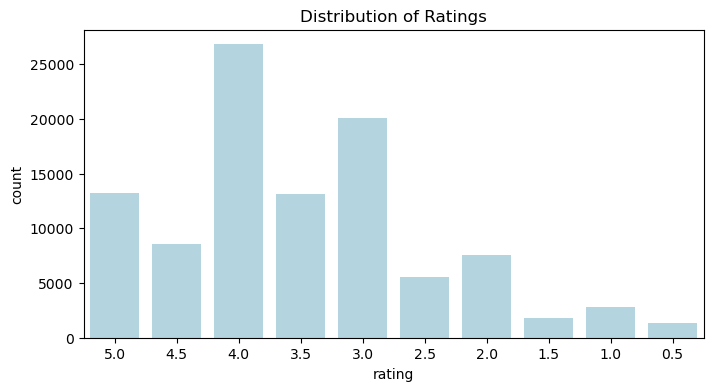

In [21]:
# Ratings distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='rating', data=ratings, order=ratings['rating'].value_counts().index.sort_values(ascending=False), color='lightblue')
plt.title('Distribution of Ratings')
plt.show()


- This visualization displays the distribution of ratings given by users. The x-axis represents the ratings, ranging from the lowest to the highest. The height of each bar corresponds to the frequency or count of ratings. The plot is ordered from highest to lowest ratings.


### Top rated movies

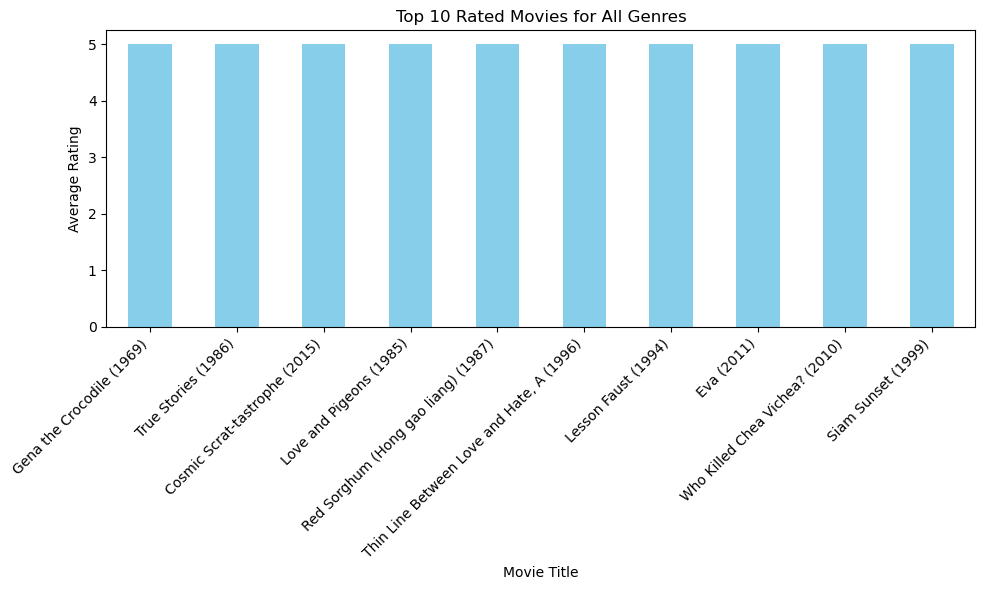

In [22]:
# Merge ratings and movies DataFrames
merged_df = pd.merge(ratings, movies, on='movieId')

# Calculate average ratings for each movie
avg_ratings = merged_df.groupby('title')['rating'].mean().sort_values(ascending=False)

# Get top 10 rated movies
top_movies_all_genres = avg_ratings.head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_movies_all_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Rated Movies for All Genres')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- It merges the ratings and movies DataFrames, calculates the average rating for each movie, selects the top 10 rated movies, and plots them in a bar chart with the specified formatting.

### Genre Popularity Analysis

C:\Users\PC\AppData\Local\Temp\ipykernel_11976\307420338.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  genre_ratings_count[genre] = merged_df[merged_df['genres'].str.contains(genre)]['rating'].count()


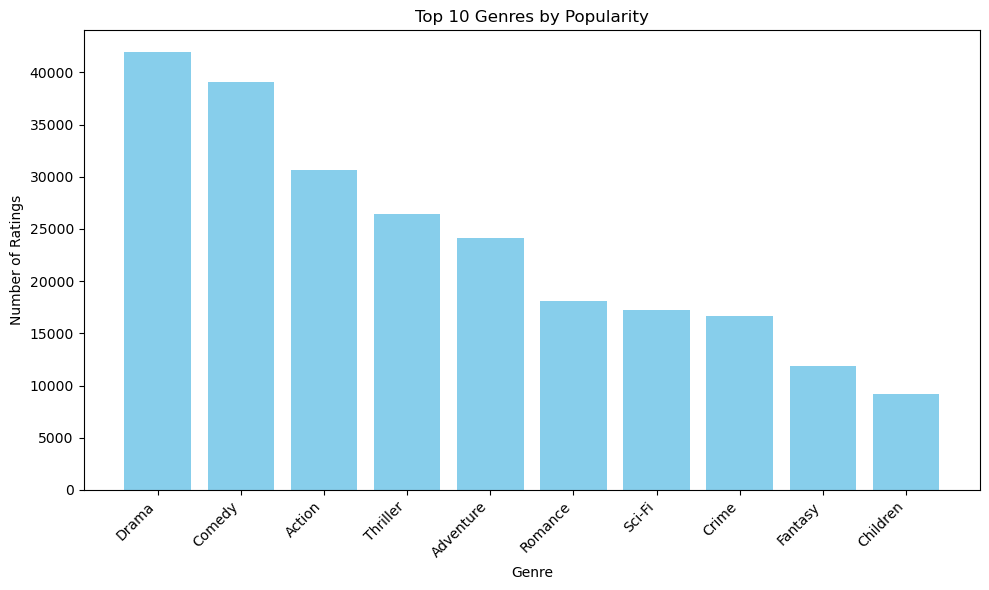

In [23]:
# Function to count ratings for each genre
def count_ratings_by_genre():
    genre_ratings_count = {}
    # Iterate through each unique genre
    for genre in set(merged_df['genres'].str.split('|').sum()):
        # Count the number of ratings for movies belonging to the current genre
        genre_ratings_count[genre] = merged_df[merged_df['genres'].str.contains(genre)]['rating'].count()
    return genre_ratings_count

# Get genre ratings count
genre_ratings_count = count_ratings_by_genre()

# Sort genres by popularity (number of ratings)
sorted_genres = sorted(genre_ratings_count.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract genre names and ratings counts
genres = [genre[0] for genre in sorted_genres]
ratings_count = [genre[1] for genre in sorted_genres]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(genres, ratings_count, color='skyblue')
plt.title('Top 10 Genres by Popularity')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


- The above plot shows popularity of movie genres by counting the number of ratings for each genre in the dataset.The top 10 genres are then determined based on the number of ratings and visualized using a bar chart. 

In [24]:
# Drop unnecessary columns
ratings = ratings.drop(columns='timestamp')
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


### Data Preparation for Surprise

In [25]:
# Prepare the data for Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)



- This code prepares the data for the Surprise library, commonly used for recommendation systems. It defines a rating scale from 0.5 to 5.0 and loads the ratings data from the DataFrame `ratings`, containing 'userId', 'movieId', and 'rating' columns. This step is essential for further processing and modeling using Surprise.


In [26]:
# Finding out how many users and items that are in the dataset.
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  610 

Number of items:  9724



- It displays number of users and items in the dataset. It builds a full training set and prints the counts of users and items.


In [27]:
# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

## MODELING

1. Baseline Model-Normal Predictor 
2. SVD Model
3. KNN Basic Model